Hey Guys, Hope you all are doing well. <br> This notebook will contain most common data visualization techniques generally used by data scientists. You can use these techniques for getting better visualization of your data and moving forward to process it accordingly.<br> You can use this notebook as a reference for coding various data visualization without worring abour remembering the codes.<br><br> 
## Table of Content<br> 
### **SECTION - 1** 
1. <b>Scatter Plot</b>
2. <b>Line Plot</b>
3. <b>Histograms</b>
4. <b>Bar Chart</b>
5. <b>Heat Map</b>
6. <b>Box Plot</b>
7. <b>Word Cloud.</b>

### **SECTION - 2**
1. <b>Box Plot</b>
2. <b>Bubble Plot</b>
3. <b>Area Plot</b>
4. <b>Pie Charts</b>
5. <b>Venn Diagrams</b>
6. <b>Pair Plot</b>
7. <b>Joint Plot / Marginal Plots</b>

### **SECTION - 3**
1. <b>Violin plot</b>
2. <b>Dendrograms</b>
3. <b>Andrew Curves</b>
4. <b>Treemaps</b>
5. <b>Network Charts</b>
6. <b>3-d Plots</b>
7. <b>Geographical maps </b> <br><br>
You can get shortlinks on right side provided by kaggle.<br>
In case you like my work **LIKE , COMMENT and FORK** this notebook.

In [1]:
# Library Import

import math,os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
# Reading the Dataset
iris = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')
iris_feat = iris.iloc[:,:-1]
iris_species = iris.iloc[:,-1]

In [3]:
iris_feat.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

# Section - 1

# Scatter Plot

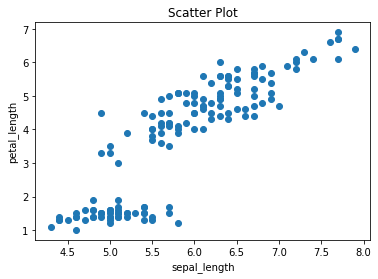

In [4]:
# matplotlib 

plt.scatter(x = iris_feat['sepal_length'],y = [iris_feat['petal_length']],alpha=1)

plt.title('Scatter Plot')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
#Show the plot
plt.show()

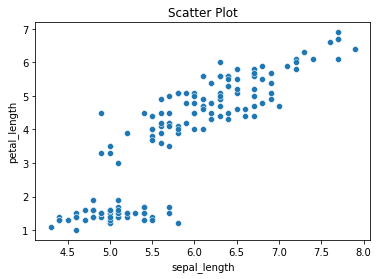

In [5]:
# Sns 
sns.scatterplot(data=iris_feat, x="sepal_length", y="petal_length")

plt.title('Scatter Plot')
plt.xlabel('sepal_length')
plt.ylabel('petal_length') 
# Show the plot
plt.show()

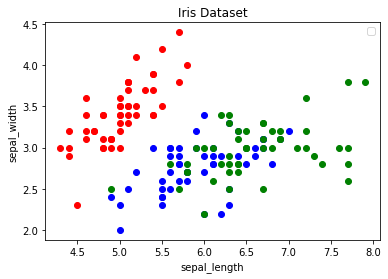

In [6]:
# Multivariate Scatter Plot

colors = {'Iris-setosa':'r', 'Iris-virginica':'g', 'Iris-versicolor':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(iris_feat['sepal_length'])):
    ax.scatter(iris_feat['sepal_length'][i], iris_feat['sepal_width'][i],color=colors[iris_species[i]])
    
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

ax.legend()
plt.show()

# Line Plot

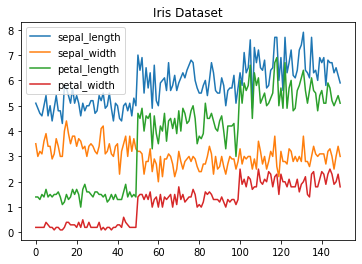

In [7]:

# get columns to plot
columns = iris_feat.columns
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

<AxesSubplot:xlabel='A', ylabel='B'>

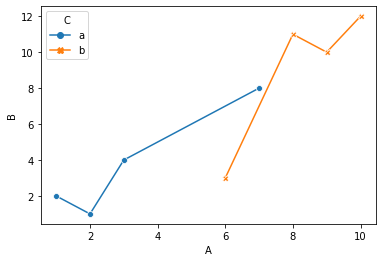

In [8]:
# Seaborn Implementation

df = pd.DataFrame({
    'A': [1,3,2,7,9,6,8,10],
    'B': [2,4,1,8,10,3,11,12],
    'C': ['a','a','a','a','b','b','b','b']
})

sns.lineplot(
    data=df,
    x="A", y="B", hue="C",style="C",
    markers=True, dashes=False
)

# Histogram

Text(0, 0.5, 'Frequency')

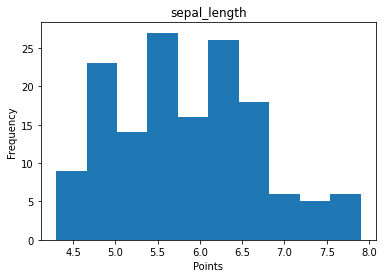

In [9]:
# normal
fig, ax = plt.subplots()
# plot histogram
ax.hist(iris_feat['sepal_length'])
# set title and labels
ax.set_title('sepal_length')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


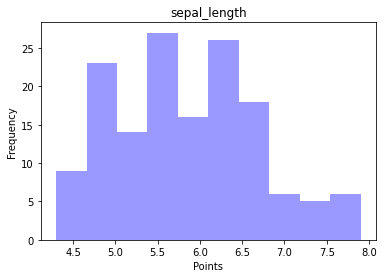

In [10]:
sns.distplot(iris_feat['sepal_length'], kde=False, color='blue', bins=10)

plt.title('sepal_length')
plt.xlabel('Points')
plt.ylabel('Frequency') 
# Show the plot
plt.show()

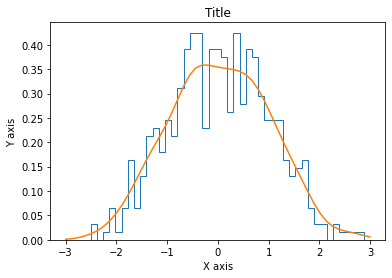

In [11]:
# line histogram

#Creating the dataset
test_data = np.random.normal(0, 1, (500, ))
density = stat.gaussian_kde(test_data)
#Creating the line histogram
n, x, _ = plt.hist(test_data, bins=np.linspace(-3, 3, 50), histtype=u'step', density=True)  
plt.plot(x, density(x))

plt.title('Title')
plt.xlabel('X axis')
plt.ylabel('Y axis') 
#Show the plot
plt.show()

# Bar Charts

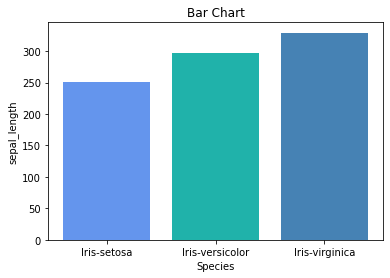

In [12]:
# matplotlib implementation

df = iris.groupby('species')['sepal_length'].sum().to_frame().reset_index()

#Creating the bar chart 
plt.bar(df['species'],df['sepal_length'],color = ['cornflowerblue','lightseagreen','steelblue']) 

plt.title('Bar Chart')
plt.xlabel('Species')
plt.ylabel('sepal_length') 

#Show the plot
plt.show()

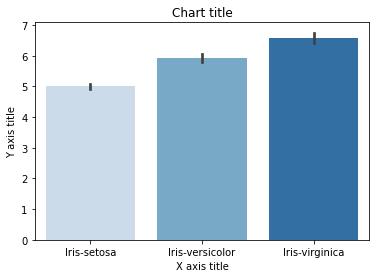

In [13]:
# Sns Implementation

sns.barplot(x = 'species',y = 'sepal_length',data =iris,palette = "Blues")

plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

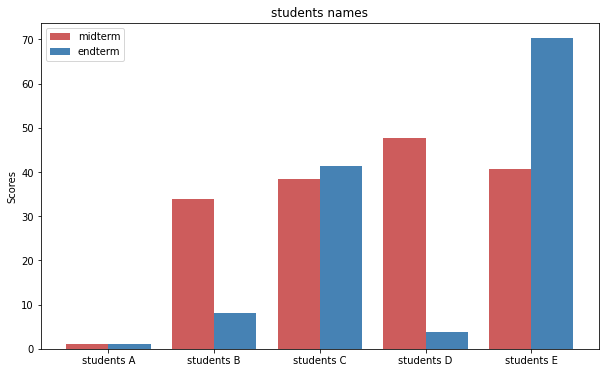

In [14]:
# Grouped Bar chart

mid_term_marks=[ random.uniform(0,50) for i in range(5)]
end_term_marks=[ random.uniform(0,100) for i in range(5)]

fig=plt.figure(figsize=(10,6))

students=['students A','students B','students C','students D','students E']
x_pos_mid=list(range(1,6))
x_pos_end=[ i+0.4 for i in x_pos_mid]

graph_mid_term=plt.bar(x_pos_mid, mid_term_marks,color='indianred',label='midterm',width=0.4)
graph_end_term=plt.bar(x_pos_end, end_term_marks,color='steelblue',label='endterm',width=0.4)

plt.xticks([i+0.2 for i in x_pos_mid],students)
plt.title('students names')
plt.ylabel('Scores')

plt.legend()  
plt.show()

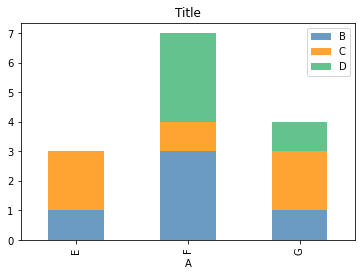

In [15]:
# Stacked Bar chart

df = pd.DataFrame(columns=["A","B", "C","D"], 
                  data=[["E",1,2,0],
                        ["F",3,1,3],
                        ["G",1,2,1]])

df.plot.bar(x='A', y=["B", "C","D"],  stacked=True, alpha=0.8 ,color=['steelblue','darkorange' ,'mediumseagreen']) 

plt.title('Title')

#Show the plot
plt.show()

# Heatmap

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


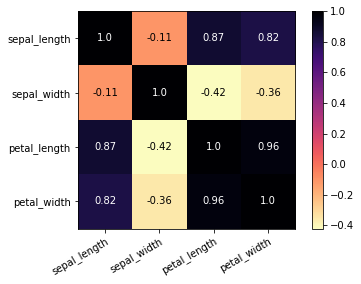

In [16]:
corr = iris.corr()

fig, ax = plt.subplots()
img = ax.imshow(corr.values,cmap = "magma_r")

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
cbar = ax.figure.colorbar(img, ax=ax ,cmap='')
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if corr.iloc[i, j]<0:
            text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")
        else:
            text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="white")

# Word Cloud

In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


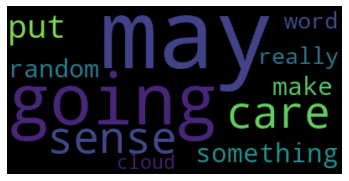

In [18]:
from wordcloud import WordCloud, ImageColorGenerator

text = '''I have just put something random that may or may not going to make some sense 
        but are we really going to care about sense or we care about word cloud.'''

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Section - 2

# Box Plot

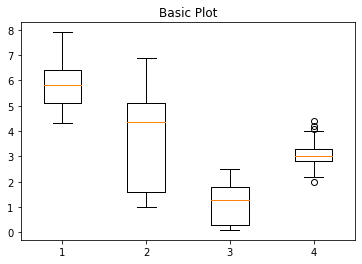

In [19]:
sepal_length = iris_feat['sepal_length']
petal_length = iris_feat['petal_length']
petal_width = iris_feat['petal_width']
sepal_width = iris_feat['sepal_width']

data = [sepal_length , petal_length , petal_width , sepal_width]
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)
plt.show()

# Bubble Plot

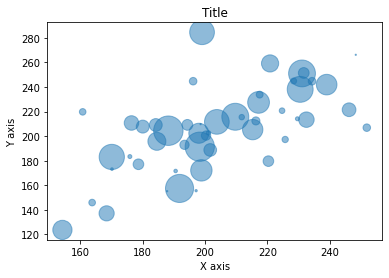

In [20]:
N = 50
x = np.random.normal(200, 20, N)
y = x + np.random.normal(5, 25, N)
area = (30 * np.random.rand(N))**2
df = pd.DataFrame({
    'X': x,
    'Y': y,
    "size":area})
plt.scatter('X', 'Y', s='size',alpha=0.5, data=df)

plt.title('Title')
plt.xlabel('X axis')
plt.ylabel('Y axis') 

plt.show()

# Area Plots

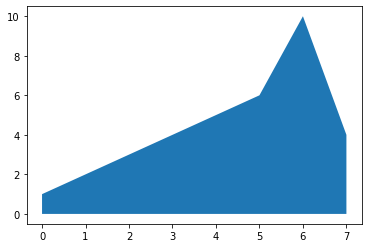

In [21]:
# Standard Area Plots

# Making some temporary data
y = [1,2,3,4,5,6,10,4]
x = list(range(len(y)))
#Creating the area chart 
plt.fill_between(x, y)

#Show the plot
plt.show()

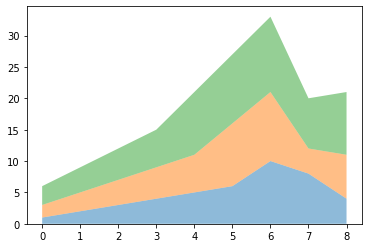

In [22]:
# Stacked Area Plot

y = [[1,2,3,4,5,6,10,8,4] , [2,3,4,5,6,10,11,4,7] , [3,4,5,6,10,11,12,8,10]]
x = list(range(len(y[0])))

ax = plt.gca()
ax.stackplot(x, y, labels=['A','B','c'],alpha=0.5)
plt.show()

# Pie Chart

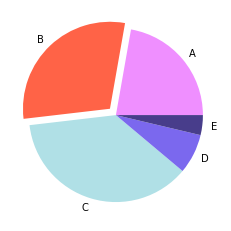

In [23]:
#Creating the dataset
students = ['A','B','C','D','E'] 
scores = [30,40,50,10,5] 
#Creating the pie chart
plt.pie(scores, explode=[0,0.1,0,0,0], labels = students,colors = ['#EF8FFF','#ff6347','#B0E0E6','#7B68EE','#483D8B'])

#Show the plot
plt.show()

# Venn Diagram

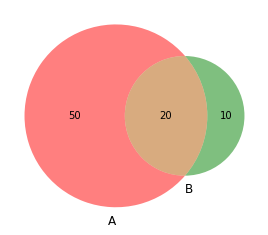

In [24]:
from matplotlib_venn import venn2 ,venn3
#Making venn  diagram

# Venn Diagram with 2 groups
venn2(subsets = (50, 10, 20), set_labels = ('A', 'B'),alpha=0.5)
plt.show()

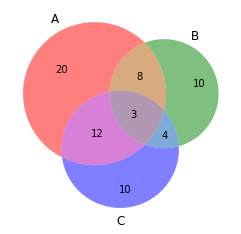

In [25]:
# Venn Diagram with 3 groups
venn3(subsets=(20, 10, 8, 10, 12, 4, 3), 
      set_labels=('A', 'B', 'C'),alpha=0.5)

# Pair Plot

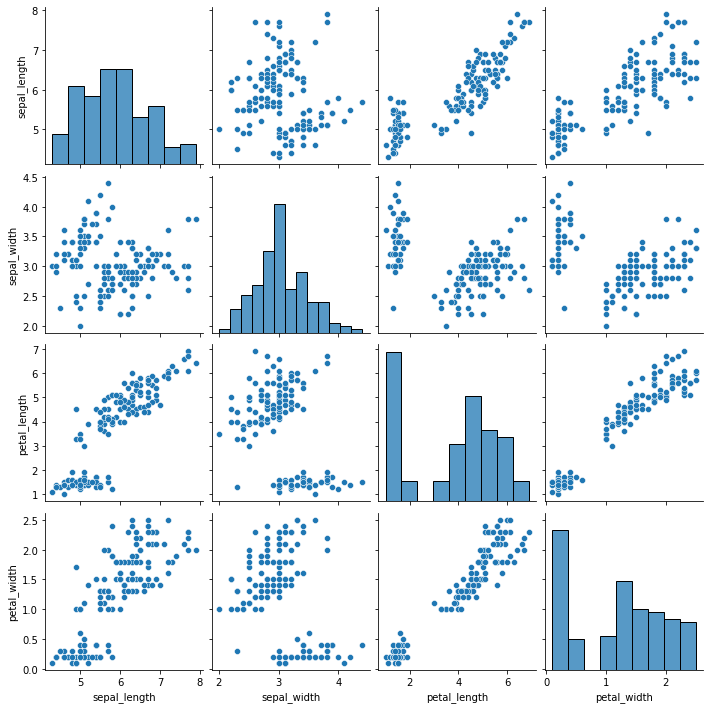

In [26]:
# type-1
sns.pairplot(iris)

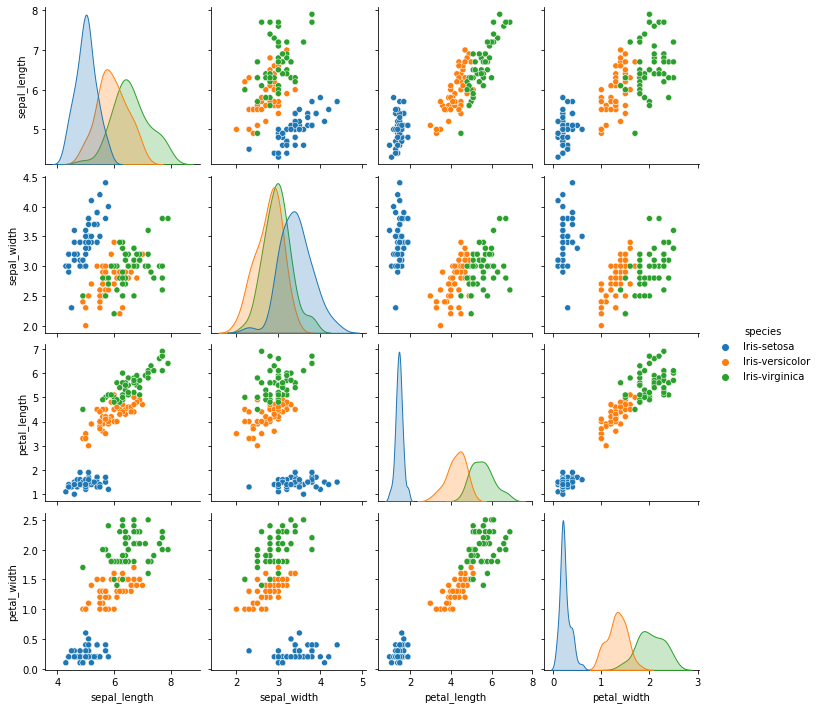

In [27]:
# type-2
sns.pairplot(iris, hue="species")

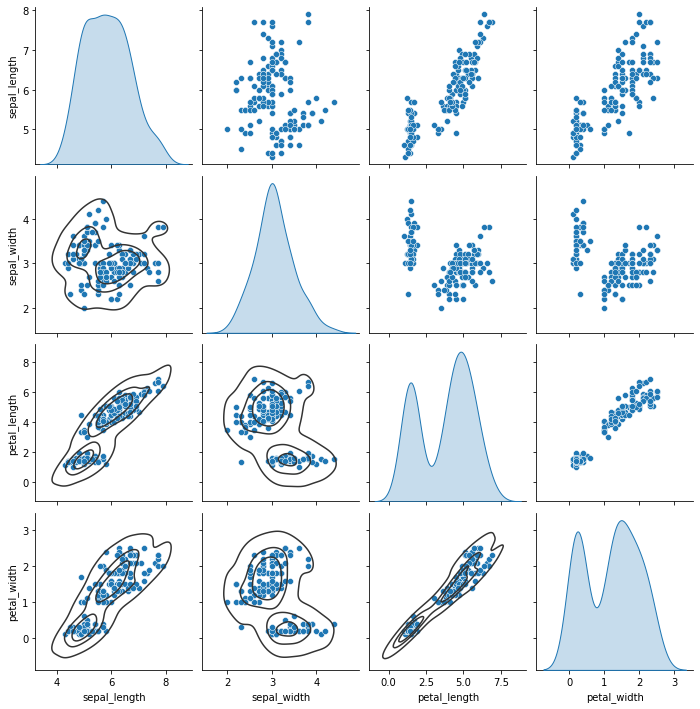

In [28]:
# type-3
g = sns.pairplot(iris, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

# Joint Plot

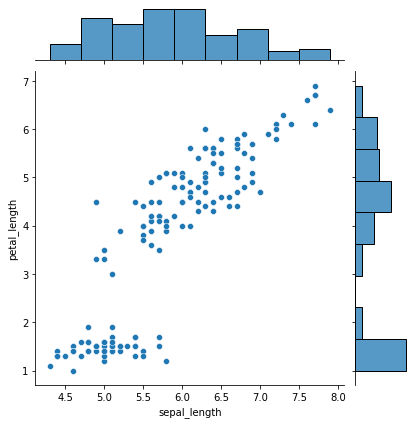

In [29]:
# Type -1 
sns.jointplot(data=iris_feat, x="sepal_length", y="petal_length")

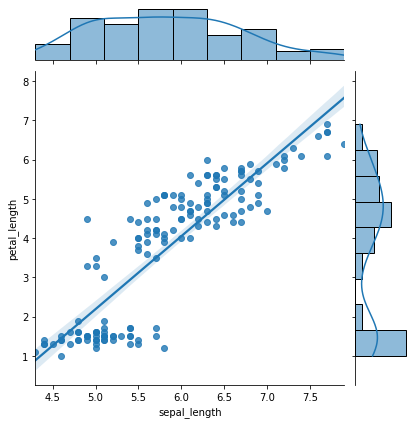

In [30]:
# type-2
sns.jointplot(data=iris, x="sepal_length", y="petal_length" , kind="reg")

# Section - 3

# Violin Plots

<AxesSubplot:xlabel='species', ylabel='petal_length'>

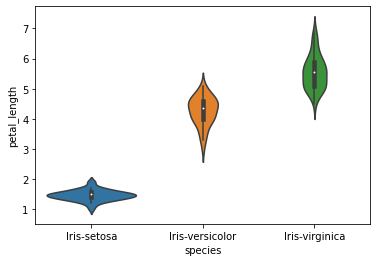

In [31]:
sns.violinplot(x="species", y="petal_length", data=iris, size=6)

# Dendrograms

In [32]:
import plotly.figure_factory as ff

X = np.random.rand(15, 10)
fig = ff.create_dendrogram(X, color_threshold=1.5)
fig.update_layout(width=800, height=500)
fig.show()

# Andrew Curves

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:263: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



<AxesSubplot:>

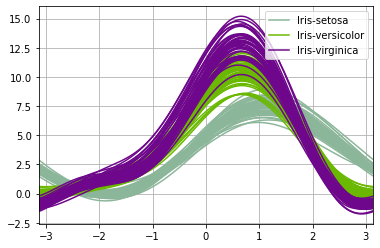

In [33]:
from pandas.plotting import andrews_curves
andrews_curves(iris, "species")

# Tree Maps

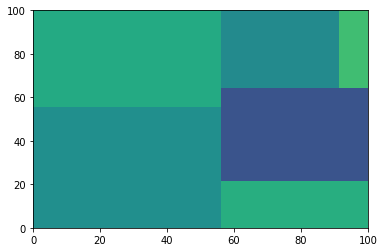

In [34]:
import squarify 
sizes = [50, 40, 15, 30, 20,5]
squarify.plot(sizes)
# Show the plot
plt.show()

# Network Charts

In [35]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


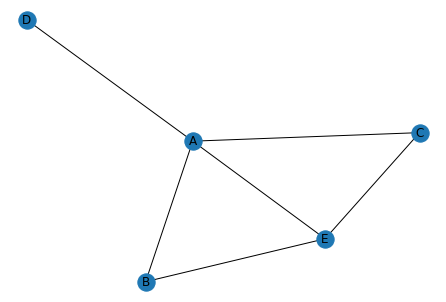

In [36]:
 import networkx as nx
    
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A' ,'A' ,'E'], 'to':['D', 'A', 'E','C','E','B']})
 
# Build your graph
graph=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(graph, with_labels=True)
plt.show()

# 3-d Plot

In [37]:
import plotly.express as px

fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_length',
              color='species')
fig.show()

# Geographical Maps

In [38]:
df = pd.DataFrame({
    'Country': ['India','Russia','United States', 'China','Sri Lanka'],
    'Random_Value': [100,101,80,5,50]
})
fig = px.choropleth(df, locations="Country",
                    color="Random_Value", 
                    locationmode='country names',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()